<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/mssmartypants/rice-type-classification/data

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset/riceClassification.csv')
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [3]:
df= df.drop('id',axis=1)

In [4]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [5]:
df.shape

(18185, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.5 MB


In [7]:
df['Class'].value_counts()

Class
1    9985
0    8200
Name: count, dtype: int64

In [8]:
df.duplicated().sum()

0

<h2>EDA</h2>

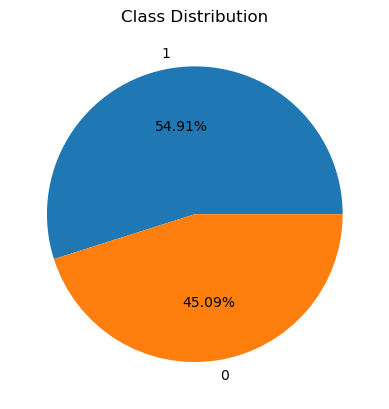

In [9]:
plt.pie(df['Class'].value_counts(), labels=df['Class'].value_counts().index, autopct='%1.2f%%')
plt.title('Class Distribution')
plt.show();

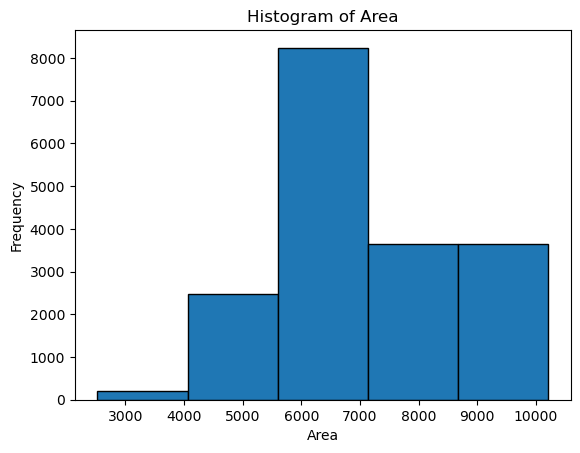

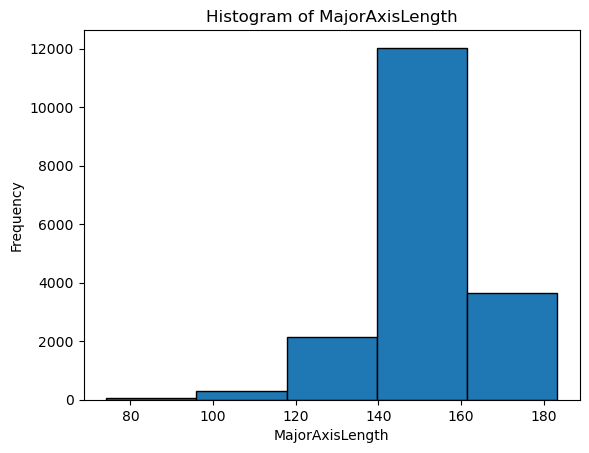

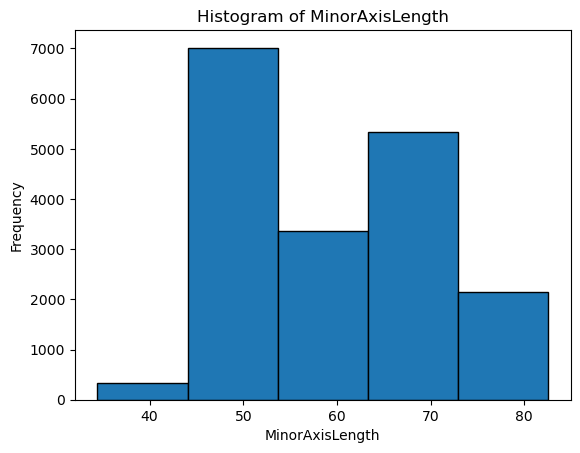

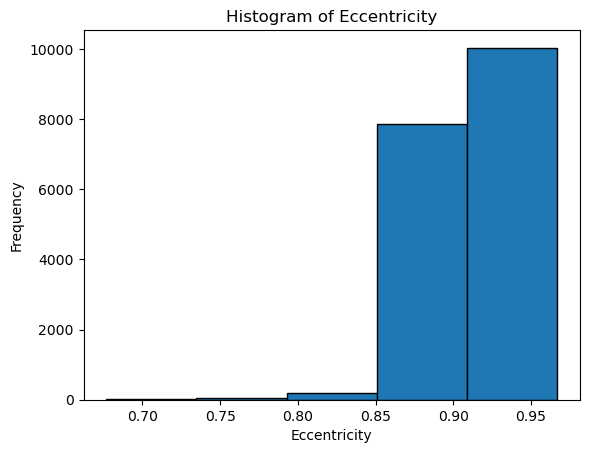

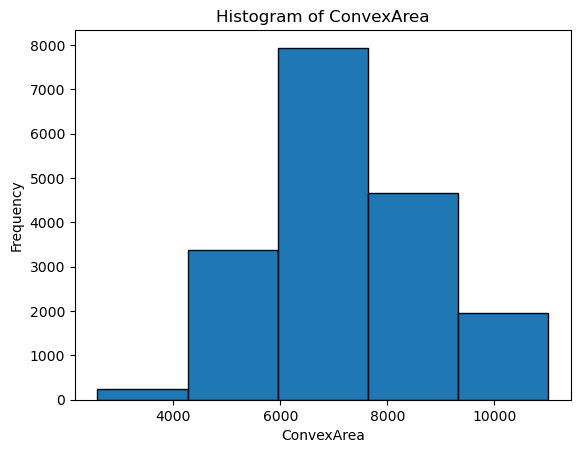

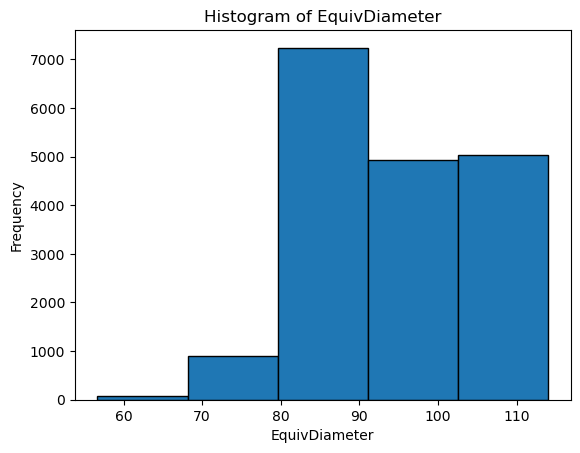

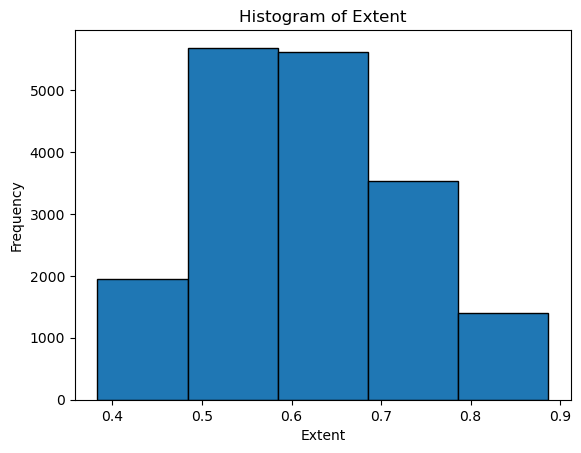

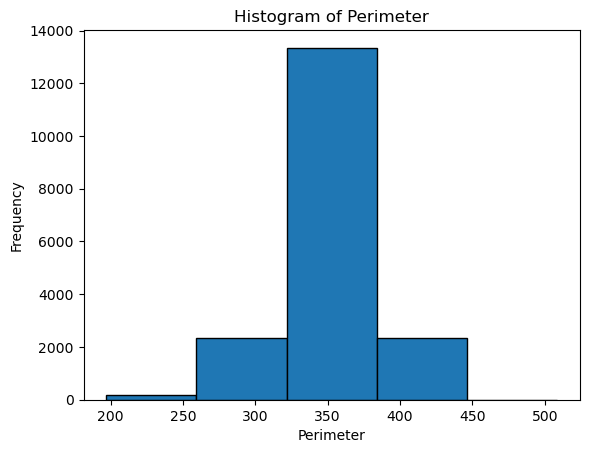

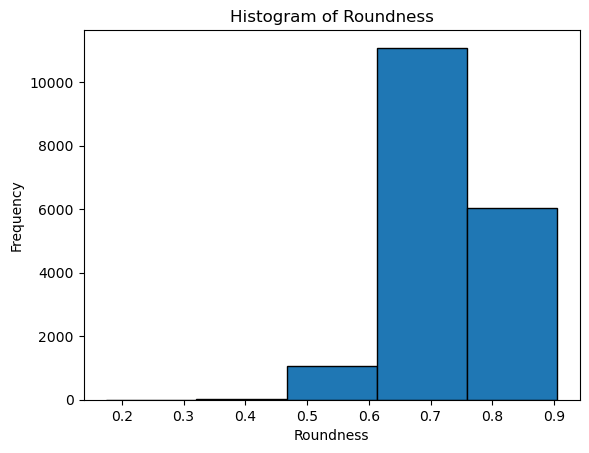

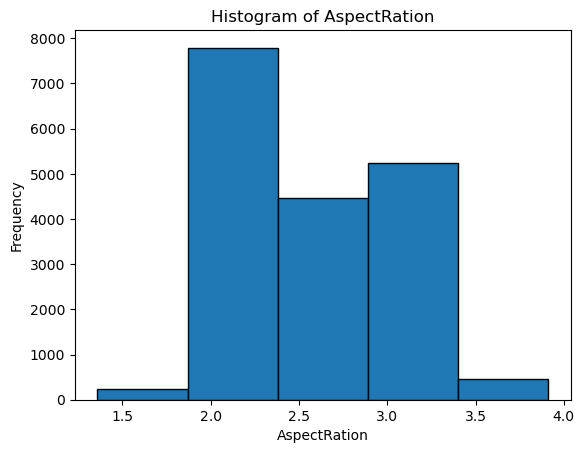

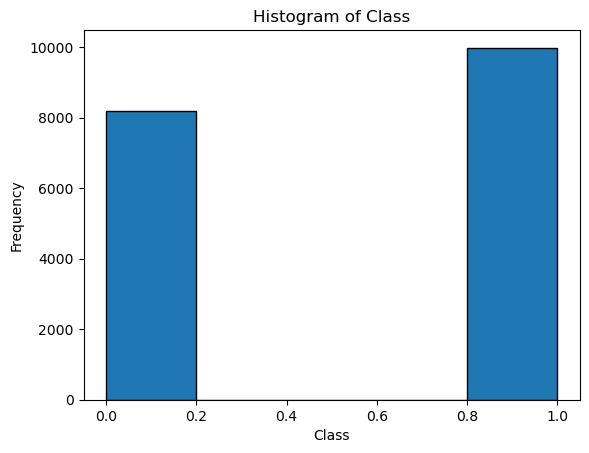

In [10]:
for col in df.columns:
    plt.figure() 
    plt.hist(df[col], bins=5, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show();

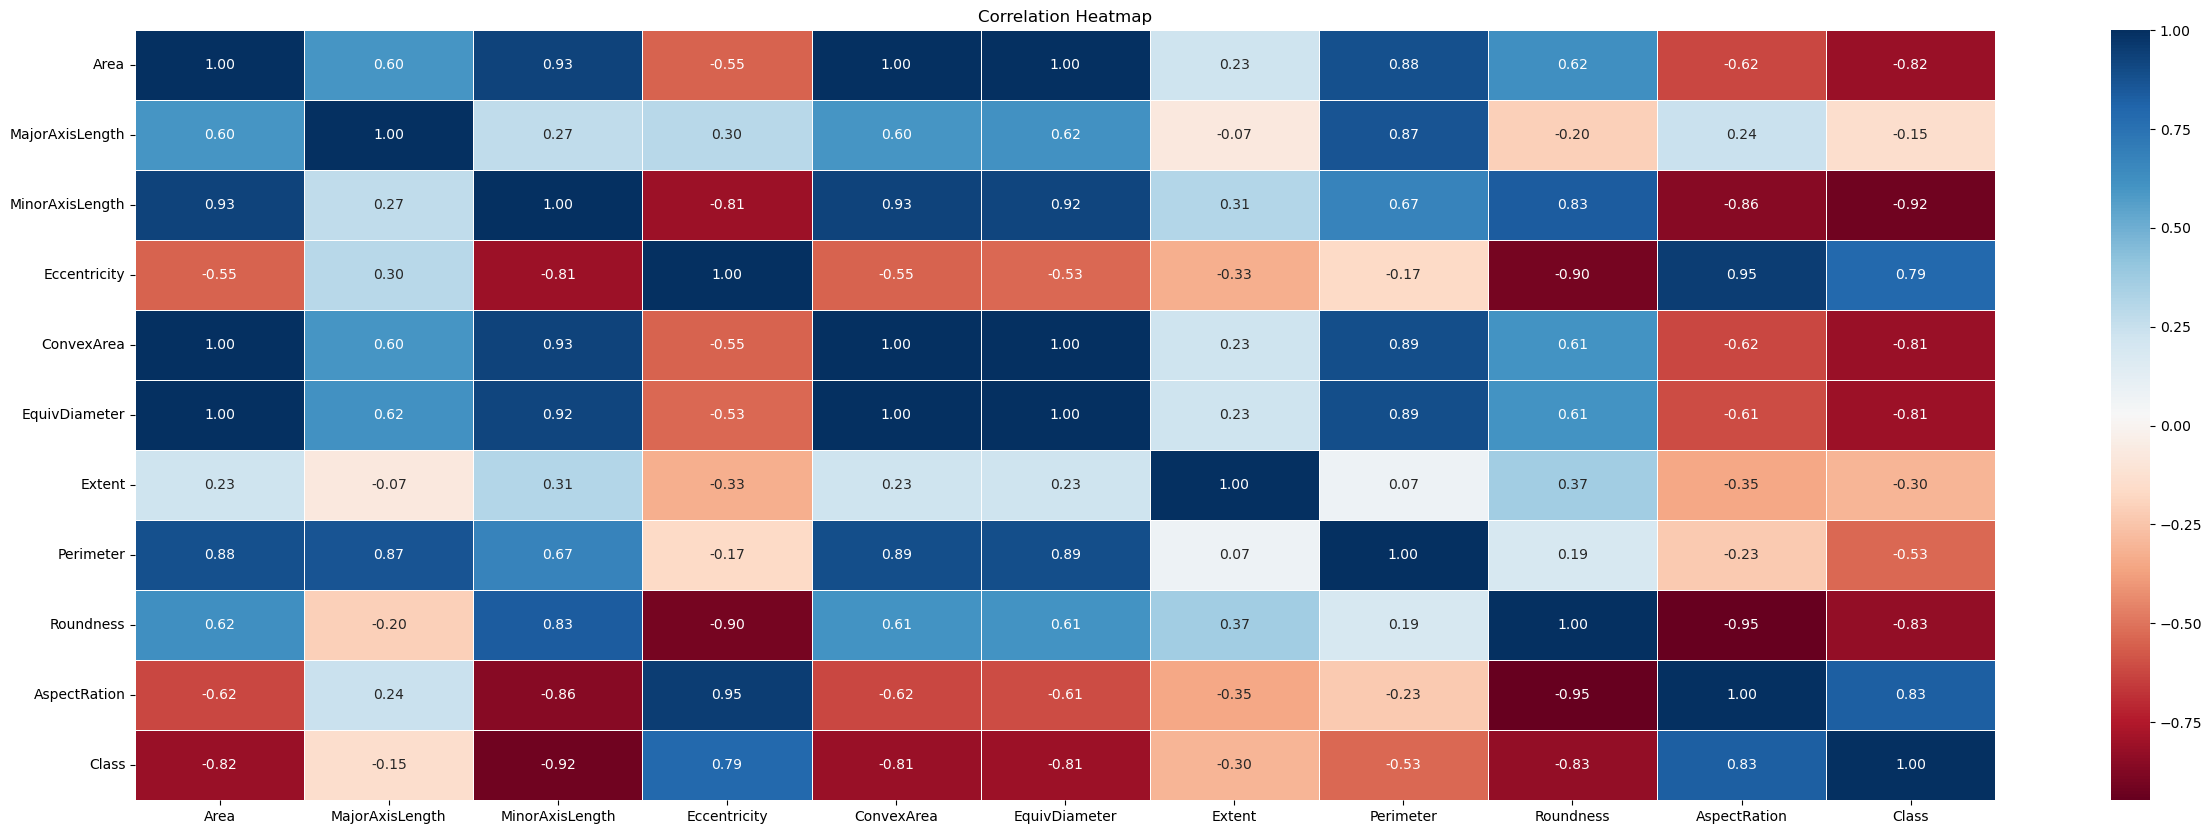

In [11]:
plt.figure(figsize=(30, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show();

In [12]:
x = df.drop('Class',axis=1)
y = df['Class']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<h2>Machine Learning</h2>

In [14]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
print('Training score:',lr.score(x_train, y_train))
print('Testing score:',lr.score(x_test,y_test))

Training score: 0.9890706626340391
Testing score: 0.9898267803134452


In [15]:
y_pred = lr.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1632
           1       0.99      0.99      0.99      2005

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637



In [16]:
print(confusion_matrix(y_test, y_pred))

[[1609   23]
 [  14 1991]]


<h2>Deep Learning</h2>

In [17]:
DL_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
DL_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = DL_model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=5)])

Epoch 1/50
910/910 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.9514 - loss: 0.1131 - val_accuracy: 0.9885 - val_loss: 0.0330
Epoch 2/50
910/910 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9886 - loss: 0.0355 - val_accuracy: 0.9890 - val_loss: 0.0338
Epoch 3/50
910/910 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9881 - loss: 0.0313 - val_accuracy: 0.9887 - val_loss: 0.0343
Epoch 4/50
910/910 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9896 - loss: 0.0314 - val_accuracy: 0.9893 - val_loss: 0.0321
Epoch 5/50
910/910 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9893 - loss: 0.0313 - val_accuracy: 0.9887 - val_loss: 0.0339
Epoch 6/50
910/910 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9894 - loss: 0.0295 - val_accuracy: 0.9885 - val_loss: 0.0318
Epoch 7/50
910/910 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9904 - loss: 0.0314 - val_accuracy: 0.9885 - val_loss: 0.0333
Epoch 8/50
910/910 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9905 - loss: 0.0270 - 

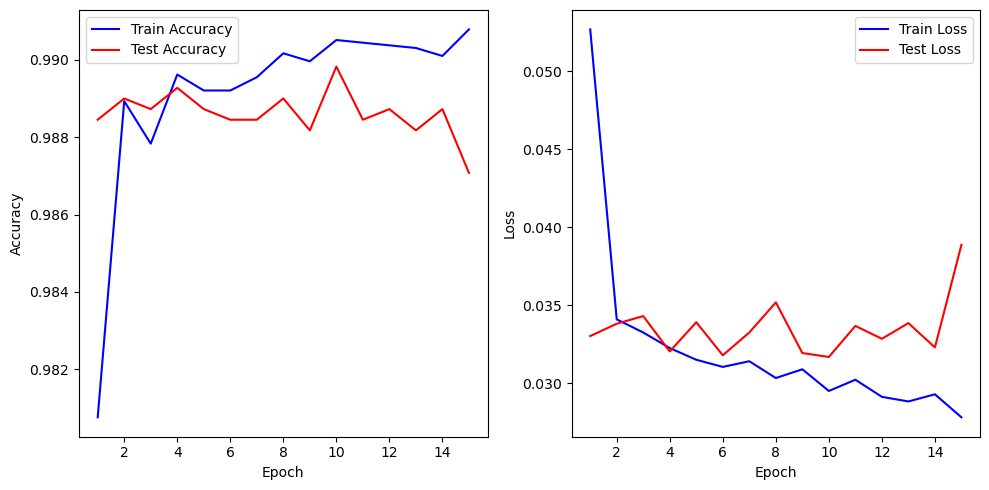

In [18]:
# learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# adusting layout for better spacing
plt.tight_layout()

# display the figure
plt.show();

In [19]:
pred = DL_model.predict(x_test)
y_pred = (pred>0.5).astype(int)
accuracy_score(y_test, y_pred)

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


0.9870772614792411

In [20]:
cr_DL = classification_report(y_test, y_pred)
print(cr_DL)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1632
           1       0.99      0.99      0.99      2005

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637



In [21]:
cm_DL = confusion_matrix(y_test, y_pred)
print(cm_DL)

[[1611   21]
 [  26 1979]]


<h2>Machine Learning vs Deep Learning</h2>

In [22]:
new_data = [[6000, 150, 55, 0.85, 6200, 90, 0.6, 350, 0.7, 2.6]]

new_data_scaled = scaler.transform(new_data)

ML_prediction = lr.predict(new_data_scaled)

DL_prediction = DL_model.predict(new_data_scaled)
DL_prediction = (DL_prediction >= 0.5).astype(int)

print("ML Loan Approval Prediction:", ML_prediction)
print("DL Loan Approval Prediction:", DL_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
ML Loan Approval Prediction: [1]
DL Loan Approval Prediction: [[1]]
